# Libraries

In [146]:
import numpy as np
import pandas as pd
import io
#import requests
import matplotlib.pyplot as plt
import warnings
from IPython.display import Markdown as md
import seaborn as sb
#import missingno as msno


warnings.filterwarnings('ignore')
# set to show all columns
pd.set_option('display.max_columns', 55)

# Declarations

In [147]:
def plot_var(var='positive'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df2[var]
    x = df2['date']
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.plot(x,y,color='navy')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

def plot_hist(var='positiveIncrease'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df2[var]
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.hist(y,color='royalblue')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

def add_sevenday_newCases(df):

    df['sevenDayAvg_newCases'] = 'NA'

    for i in range(0, len(df['positiveIncrease'])):
        if i < 7:
            df['sevenDayAvg_newCases'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['positiveIncrease'][i-y])
            df['sevenDayAvg_newCases'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for hospitalization
def add_sevenday_hospitalize(df):

    df['sevenDayAvg_hospitalize'] = 'NA'

    for i in range(0, len(df['hospitalizedIncrease'])):
        if i < 7:
            df['sevenDayAvg_hospitalize'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['hospitalizedIncrease'][i-y])
            df['sevenDayAvg_hospitalize'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for Death
def add_sevenday_death(df):

    df['sevenDayAvg_death'] = 'NA'

    for i in range(0, len(df['deathIncrease'])):
        if i < 7:
            df['sevenDayAvg_death'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['deathIncrease'][i-y])
            df['sevenDayAvg_death'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for Test Result
def add_sevenday_testResult(df):

    df['sevenDayAvg_testResult'] = 'NA'

    for i in range(0, len(df['totalTestResultsIncrease'])):
        if i < 7:
            df['sevenDayAvg_testResult'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['totalTestResultsIncrease'][i-y])
            df['sevenDayAvg_testResult'][i] = round(sum(weekly) / 7)
    return df

# Rejected Data Sources

## Rejected Datasource 1 (CDC)

In [148]:
%%script echo skipping # to make code not execute

from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import datetime


response=request(url='https://data.cdc.gov/id/vbim-akqf.json?current_status=Laboratory-confirmed%20case', method='get')
covid_records_cdc = response.json()
cdc_df = pd.DataFrame(covid_records_cdc)
format_dt = '%Y-%m-%dT%H:%M:%S.%f'
format_dt2 = '%Y-%m-%d'
# Format dates
pd.to_datetime(cdc_df['cdc_case_earliest_dt'], format=format_dt)
pd.to_datetime(cdc_df['cdc_report_dt'], format=format_dt)
pd.to_datetime(cdc_df['pos_spec_dt'], format=format_dt)
cdc_df['cdc_case_earliest_dt']=pd.to_datetime(cdc_df['cdc_case_earliest_dt'], format=format_dt2)
cdc_df['cdc_report_dt']=pd.to_datetime(cdc_df['cdc_report_dt'], format=format_dt2)
cdc_df['pos_spec_dt']=pd.to_datetime(cdc_df['pos_spec_dt'], format=format_dt2)
cdc_df.head()


Couldn't find program: 'echo'


*Since the data source doesn't provide the location of the patient, we won't be able to use it for our current
analysis*

## Rejected Datasource 2 (Johns Hopkins University)


In [149]:
%%script echo skipping # to make code not execute

# There are 424 columns present in the dataset, and the dates are present as columns. We can apply pivot on dates and
# convert columns to rows. We will delete unnecessary columns such as iso2,iso3, Country_Region, Lat, Long_, FIPS,
# Admin2, Combined_Key. Apply filter on Province_State i.e New York and timeline from March 2020 to June 2020.

# Get data
df_jhu = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_"
                     + "covid_19_time_series/time_series_covid19_confirmed_US.csv")
# View data
df_jhu.head()

df_jhu_clean = pd.DataFrame(df_jhu)
# Filter by New york state
df_jhu_clean = df_jhu_clean[df_jhu_clean['Province_State'] == 'New York']
# Timeline from March to June
df_jhu_clean = df_jhu_clean.loc[:, '3/1/20':'6/30/20']
# Check for Null value
df_jhu_clean.isnull().values.any()
# View Data
df_jhu_clean.head()

# Apply reset index and calculate new cases from confirmed cases field.

# List for Columns
column_list = df_jhu_clean.columns.tolist()
# Convert columns to rows
df2 = pd.melt(df_jhu_clean, value_vars= column_list, value_name="Confirmed_Cases")
# Change column name to Date
df2.rename(columns = {'variable':'Dates'}, inplace = True)
# Sum confirm cased and group by date
df2 = pd.DataFrame(df2.groupby('Dates').sum())
# reset index
df2.reset_index(level=None, inplace=True)
# Format Dates column
df2['Dates'] =  pd.to_datetime(df2['Dates'], format='%m/%d/%y')
# Order by Dates
df2.sort_values(by=['Dates'], inplace=True, ascending=True)
# View data
print(df2.head())

# Reset Index
df2.reset_index(level=None, drop=True, inplace=True)

# Calculate New Cases per day
def New_Cases(df2):
    df2['New_Cases'] = 'NA'

    for i in range(0, len(df2["Confirmed_Cases"])):
        if i == 0:
            df2['New_Cases'][i] = 0
        elif i > 0:
            df2['New_Cases'][i]= df2['Confirmed_Cases'][i] - df2['Confirmed_Cases'][i-1]
    return df2

# Call Function
New_Cases(df2)

# Graph for Daily New cases
def line_graph():
    x = df2['Dates']
    y = df2['New_Cases']
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format("New Cases"),fontsize=18)
    plt.plot(x,y,color='navy')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

line_graph()

Couldn't find program: 'echo'


*Opted for cleaner data set at COVID Tracking Project at Atlanta.*

# Import Data

In [150]:
# API Hosting Suppose to End 5/1/2021
url="https://api.covidtracking.com/v1/states/ny/daily.cs" # API Call for NY data

try:
    s = requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))

    if df.values.size < 3:  # ensure DF has values (may just contain 2 error values)
        raise FileNotFoundError("No data in API")
    else:
        df.to_csv('ny_covid_data.csv', index=False)  # future proof in case api goes down
        df = pd.read_csv(io.StringIO(s.decode('utf-8')))

except FileNotFoundError as fnf_error:
    df = pd.read_csv("ny_covid_data.csv")  # read from most recently fetched data
except: # catch any other unexpected error
    df = pd.read_csv("ny_covid_data.csv")

# Data Transformation

In [151]:
# Format dates
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d') 

# Impute NaN values
# df.fillna(value=-1, inplace=True)

# apply filter on date
df = df[df['date'] <= '2020-06-30']
# df = df[df['date'] <= '2020-12-30']



# NYC Holiday calendar dataset for 2020


In [152]:
# 3/20/21 A.C. commented below, we don't need Holiday and date feature

# holiday_data = {'date': ['2020-01-01','2020-01-20','2020-02-17','2020-05-25','2020-06-30','2020-09-07','2020-10-12',
# '2020-11-03','2020-11-11','2020-11-26','2020-12-25'],
# 		'Holiday': ['New Year Day','Martin Luther King Jr. Day', 'Presidents Day', 'Memorial Day',
# 		'Independence Day(Observed)','Labor Day','Columbus Day','Election Day','Veterans Day','Thanksgiving day',
# 		'Christmas Day' ],
#         'is_holiday':['1','1','1','1','1','1','1','1','1','1','1'],
# 		'is_long_weekend':['0','1','1','1','1','1','1','0','0','1','1']
# 		}

# calendar_df = pd.DataFrame (holiday_data, columns = ['date','Holiday','is_holiday','is_long_weekend'])

holiday_data = {'date': ['2020-01-01','2020-01-20','2020-02-17','2020-05-25','2020-06-30','2020-09-07','2020-10-12',
                         '2020-11-03','2020-11-11','2020-11-26','2020-12-25'],
        'is_holiday':['1','1','1','1','1','1','1','1','1','1','1'],
		'is_long_weekend':['0','1','1','1','1','1','1','0','0','1','1']
                }

calendar_df = pd.DataFrame (holiday_data, columns = ['date', 'is_holiday','is_long_weekend'])

calendar_df['date'] =  pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')  
df2 = df.set_index('date').join(calendar_df.set_index('date'))

# Fill remaining values with 0s for Non-Holiday times
df2['is_holiday'].fillna('0',inplace=True)
df2['is_long_weekend'].fillna('0', inplace=True) 

df2.head()

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,...,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,is_holiday,is_long_weekend
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-30,NY,393454,NaN,NaN,NaN,totalTestEncountersViral,3914938,891.0,89995.0,217.0,NaN,137.0,NaN,NaN,6/29/2020 00:00,2020-06-29T00:00:00Z,06/28 20:00,24855.0,89995.0,70487.0,2020-06-29T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,524,0,393454,52025,393454,NaN,13,0,e526c4b8fb8a28dea6f1fd081b5bebb486a84195,0,0,0,0,0,NaN,1,1
2020-06-29,NY,392930,NaN,NaN,NaN,totalTestEncountersViral,3862913,853.0,89995.0,216.0,NaN,136.0,NaN,NaN,6/28/2020 23:59,2020-06-28T23:59:00Z,06/28 19:59,24842.0,89995.0,70435.0,2020-06-28T23:59:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,391,0,392930,46428,392930,NaN,7,0,51bb925b19c9907d34d959bc544eb501ad200318,0,0,0,0,0,NaN,0,0
2020-06-28,NY,392539,NaN,NaN,NaN,totalTestEncountersViral,3816485,869.0,89995.0,229.0,NaN,167.0,NaN,NaN,6/27/2020 23:59,2020-06-27T23:59:00Z,06/27 19:59,24835.0,89995.0,70010.0,2020-06-27T23:59:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,616,0,392539,61906,392539,NaN,5,0,c6b2f6c762a5771b69bd2b3a1799ddd8dc4733e2,0,0,0,0,0,NaN,0,0
2020-06-27,NY,391923,NaN,NaN,NaN,totalTestEncountersViral,3754579,908.0,89995.0,230.0,NaN,167.0,NaN,NaN,6/26/2020 23:59,2020-06-26T23:59:00Z,06/26 19:59,24830.0,89995.0,70010.0,2020-06-26T23:59:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,703,0,391923,73262,391923,NaN,16,0,49d082c4525827acb47baf3905154b915f46e62d,0,0,0,0,0,NaN,0,0
2020-06-26,NY,391220,NaN,NaN,NaN,totalTestEncountersViral,3681317,951.0,89995.0,244.0,NaN,167.0,NaN,NaN,6/25/2020 23:59,2020-06-25T23:59:00Z,06/25 19:59,24814.0,89995.0,70010.0,2020-06-25T23:59:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,805,0,391220,61723,391220,NaN,14,0,0415ca28a21a379fdec8a1a34f7bf57b53a7b511,0,0,0,0,0,NaN,0,0


## MTA Ridership Data for 2020

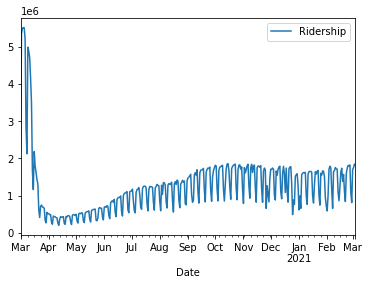

In [153]:
mta_df = pd.read_csv('MTA_data.csv',index_col=[0], parse_dates=[0])

mta_df = mta_df[[ 'Subways: Total Estimated Ridership']] 
 
mta_df['Subways: Total Estimated Ridership'] = pd.to_numeric(mta_df['Subways: Total Estimated Ridership'])

mta_df.columns = ['Ridership']
mta_df.plot()

# A.C. edit 3/20/2021, must set to variable, function alone doesn't update reference
df2 = df2.join(mta_df)

# EDA

## Missing Data

There are columns that don't have a significant impact to our analysis, namely date checked and date modified features.

These columns we want to exclude.

In [154]:
df2.drop(['dateChecked', 'dateModified'],axis=1,inplace=True)

We set a threshold of to tolerate up to 90% of values being NA per column. If a column contains more than 90% of NA
values we drop it.

In [155]:
df2.info
limitPer = len(df2) * .99

df2 = df2.dropna(thresh=limitPer, axis=1)


There are also many features that just have zeros in them, we want to exclude that in our set as well.

In [156]:
df2 = df2.loc[:, (df2 != 0).any(axis=0)]

We ended up excluding 20 columns that just contained NA values, 2 columns that didn't have significant information
(date modified and date checked), and 6 columns that only contained zeros.

# Backup Final Dataset

In [157]:
df2['date']=df2.index

df2 = df2.reset_index(drop=True)

df2.to_csv('final-ny-data.csv', index=False)

## Feature Plots
In this first plot we can see the daily number of positive cases in NY from March 2020 - June 30, 2020:

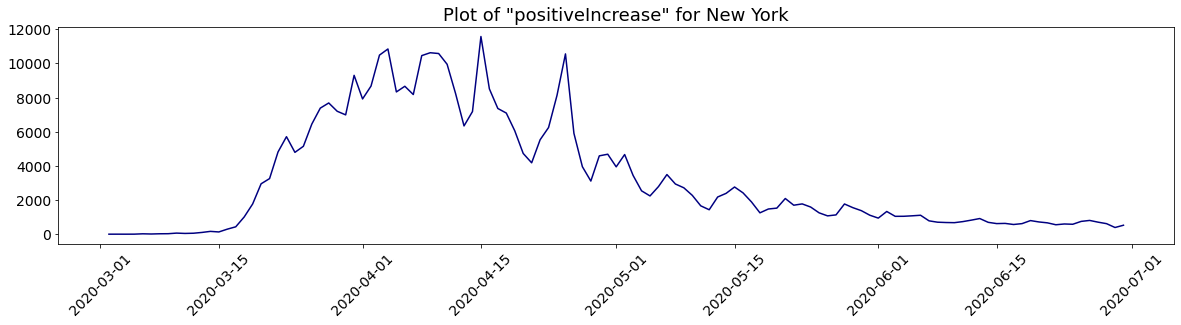

In total there were 393,454 positive cases in New York during that time range.

In [158]:
plot_var('positiveIncrease')

totalCases = "{:,.0f}".format(df2['positiveIncrease'].sum())

md(f"In total there were {totalCases} positive cases in New York during that time range.")

The following plots also show the increases in hospitalizations, deaths, and the total amount of test results.

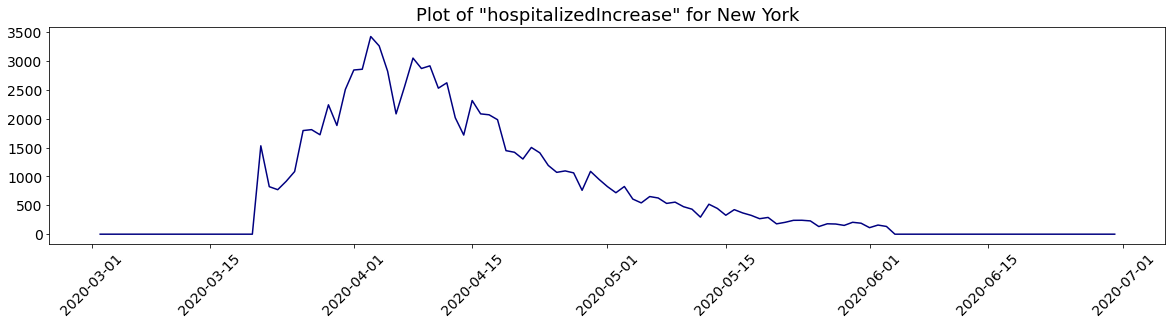

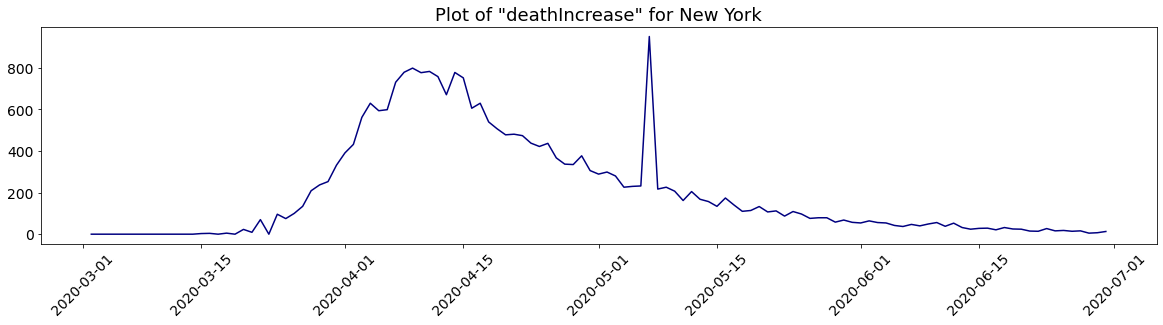

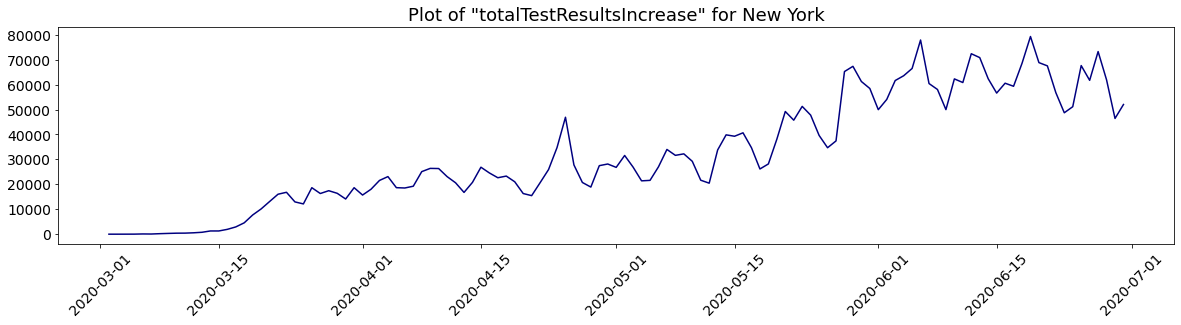

In [159]:
plot_var('hospitalizedIncrease')

plot_var('deathIncrease')

plot_var('totalTestResultsIncrease')

pd.set_option('display.max_columns', 56)

# 7 days moving average for positiveIncrease
df2.sort_values(by=['date'], inplace=True, ascending=True)

# reset index
# A.C. edit 3/20/2021 commented below, reset not needed
# df2.reset_index(level=0, inplace=True)

## Plots on 7-Day Moving Averages

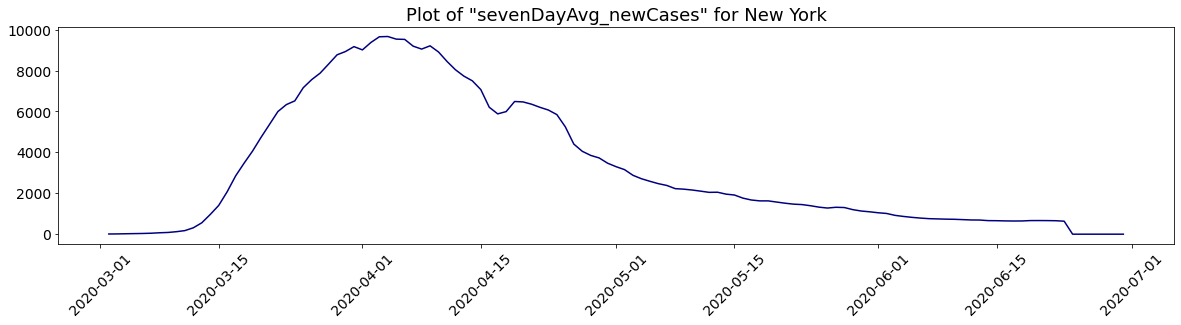

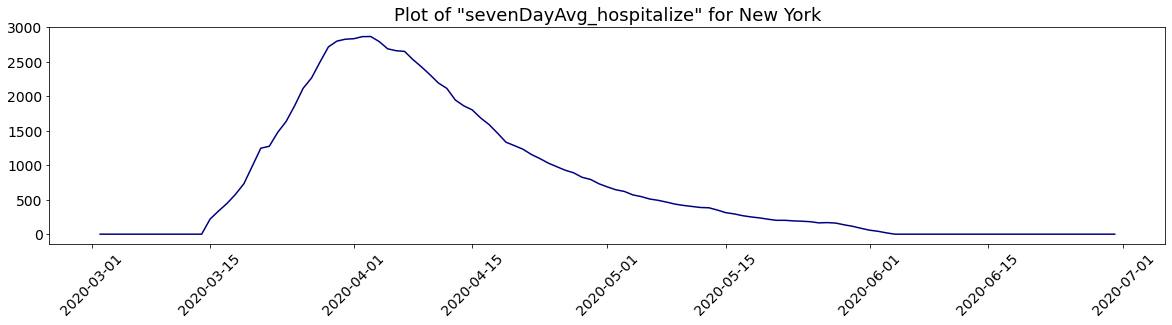

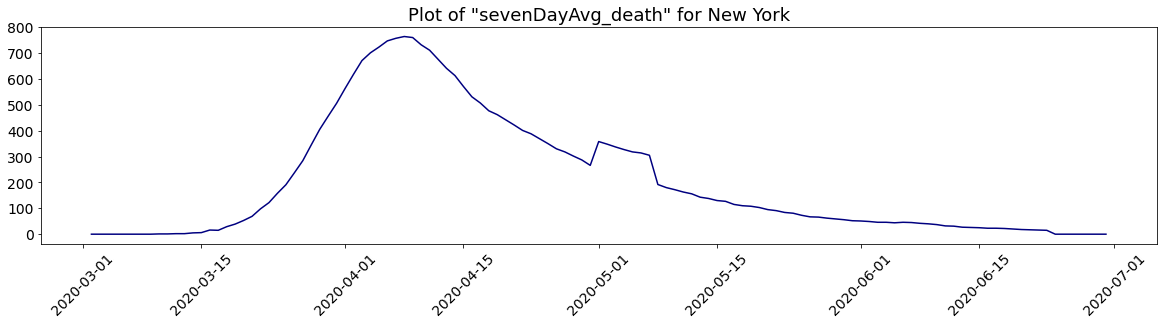

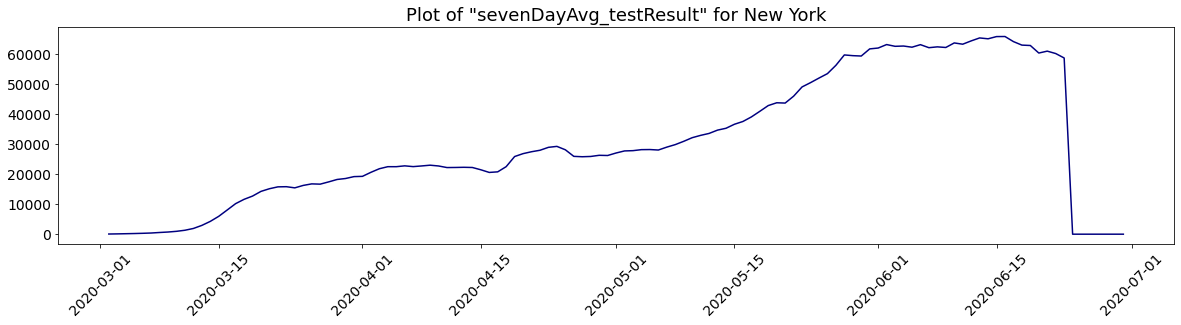

In [160]:
add_sevenday_newCases(df2)
add_sevenday_hospitalize(df2)
add_sevenday_death(df2)
add_sevenday_testResult(df2)

plot_var('sevenDayAvg_newCases')
plot_var('sevenDayAvg_hospitalize')
plot_var('sevenDayAvg_death')
plot_var('sevenDayAvg_testResult')

## Histogram Plots

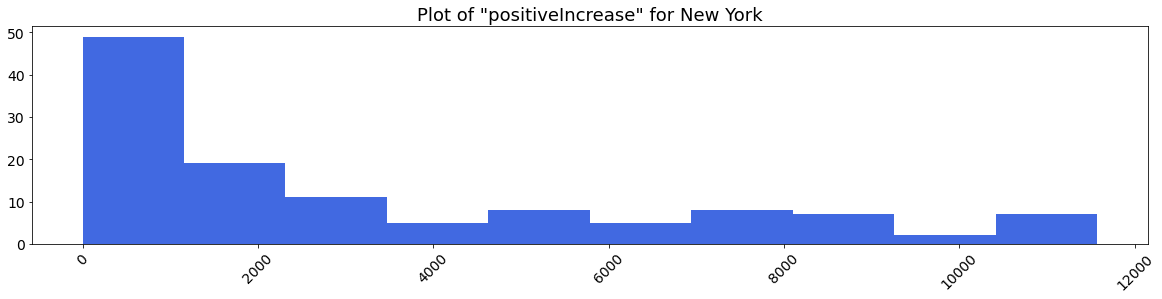

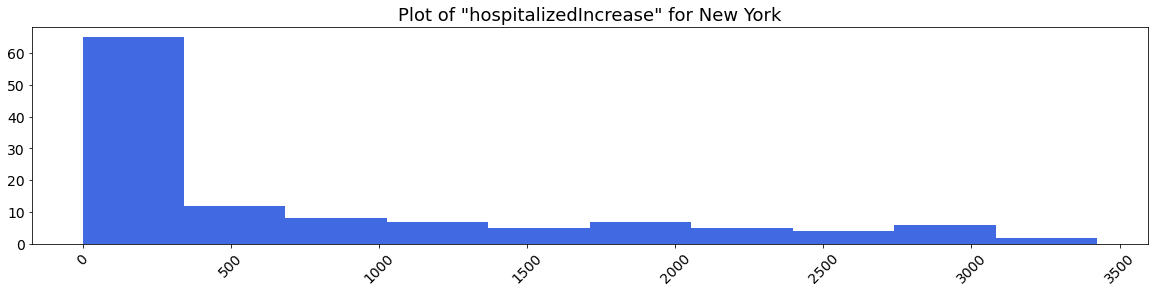

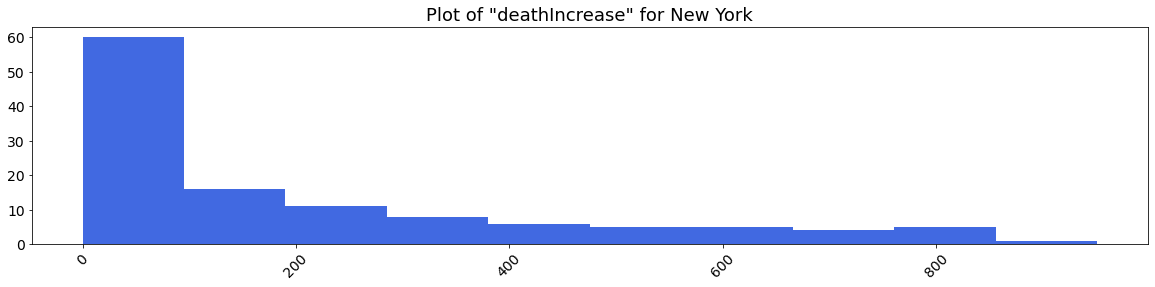

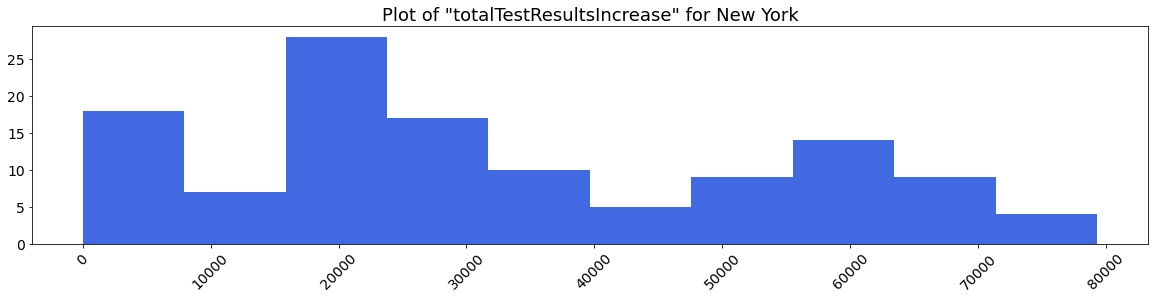

In [161]:
plot_hist('positiveIncrease')

plot_hist('hospitalizedIncrease')

plot_hist('deathIncrease')

plot_hist('totalTestResultsIncrease')

## Correlation Matrix

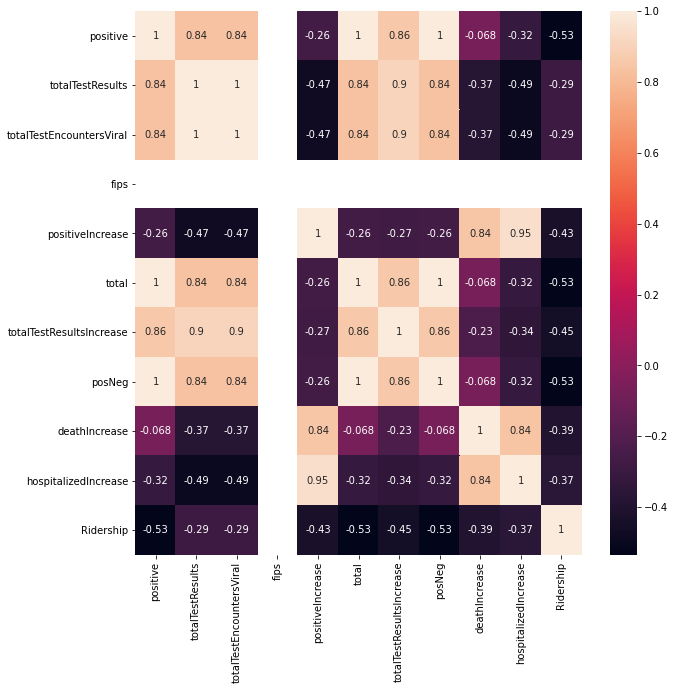

In [162]:
corrMatrix = df2.corr()
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corrMatrix, annot=True, ax = ax)
plt.show()

It's plain to see that death increases are positively correlated with hospitalizations and positive cases. It would also
make sense that there would exist a negative correlations between deaths and total tests done, as the more informed the
population is the better course of action they can take based on their status results.

**TO DO**
UPDATE EXPLANATION BASED ON NEW FEATURES

# Final State of data

In [163]:
df2.info

<bound method DataFrame.info of     state  positive    totalTestResultsSource  totalTestResults  \
120    NY         0  totalTestEncountersViral                 0   
119    NY         1  totalTestEncountersViral                 1   
118    NY         1  totalTestEncountersViral                10   
117    NY         3  totalTestEncountersViral                30   
116    NY        25  totalTestEncountersViral               122   
..    ...       ...                       ...               ...   
4      NY    391220  totalTestEncountersViral           3681317   
3      NY    391923  totalTestEncountersViral           3754579   
2      NY    392539  totalTestEncountersViral           3816485   
1      NY    392930  totalTestEncountersViral           3862913   
0      NY    393454  totalTestEncountersViral           3914938   

     totalTestEncountersViral  fips  positiveIncrease   total  \
120                         0    36                 0       0   
119                         1    